
# Project on summer olympics


#1. Problem Statement

The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.
Exploratory Data Analysis 
Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :
Finding patterns in Data
Determining relationships in Data
Checking of assumptions
Preliminary selection of appropriate models
Detection of mistakes 

#2. What is this Summer olympics:

The Summer Olympic Games (French: Jeux olympiques d'été)[1] or the Games of the Olympiad, first held in 1896, is a major international multi-sport event held once every four years. The most recent Olympics were held in Rio de Janeiro, Brazil. The International Olympic Committee (IOC) organises the Games and oversees the host city's preparations. In each Olympic event, gold medals are awarded for first place, silver medals are awarded for second place, and bronze medals are awarded for third place; this tradition began in 1904. The Winter Olympic Games were created due to the success of the Summer Olympics.

The Olympics have increased in scope from a 42-event competition with fewer than 250 male competitors from 14 nations in 1896, to 306 events with 11,238 competitors (6,179 men, 5,059 women) from 206 nations in 2016.

The Summer Olympics has been hosted on five continents by a total of nineteen countries. The Games have been held four times in the United States (in 1904, 1932, 1984 and 1996); three times in the United Kingdom (in 1908, 1948 and 2012); twice each in Greece (1896, 2004), France (1900, 1924), Germany (1936, 1972) and Australia (1956, 2000); and once each in Sweden (1912), Belgium (1920), Netherlands (1928), Finland (1952), Italy (1960), Japan (1964), Mexico (1968), Canada (1976), Soviet Union (1980), South Korea (1988), Spain (1992), China (2008) and Brazil (2016).

The IOC has selected Tokyo, Japan, to host the Summer Olympics for a second time in 2020. The 2024 Summer Olympics will be held in Paris, France, for a third time, exactly one hundred years after the city's last Summer Olympics in 1924. The IOC has also selected Los Angeles, California, to host its third Summer Games in 2028.

To date, only five countries have participated in every Summer Olympic Games – Australia, France, Great Britain, Greece and Switzerland. The United States leads the all-time medal table for the Summer Olympics.(Source: https://en.wikipedia.org/wiki/Summer_Olympic_Games)


# Importing Required libraries of python.

In [118]:

import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import pandas_profiling
import pylab as plab
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

# Load the dataset from github using pandas load_csv api. 

In [119]:
summer_olympic = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")

In [120]:
#Displaying 5 rows of dataset.
summer_olympic.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [121]:
#Displaying column informations
summer_olympic.columns 

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [122]:
len(summer_olympic)

31165

In [123]:
summer_olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


The dataset is structured and clear enough. 
The dataset consists of the information about the medals own by athlets of different participating countries being held between 1986 to 2012. Theere are total 31165 no of medals being won by athelets. 

Various variables present in the dataset includes data of Year, City, Sport, Discipline, Athlete, Country, Gender, Event, Medal

The dataset comprises of 31165 observations of 9 columns. Below is a table showing names of all the columns and their description.

              Column Name                             Description
             ---------------------------------------------------------------------------------
                Year                                  The year in which summer olympic held.
                City                                  The city where the event hosted.
                Sports                                Categories the typeof game being played.
                Discipline                            A typeof sport being played by the athletes.
                Athelete                              The name of the participant.
                Country                               The nation athelete belongs to.
                Gender                                Specifies whether men or women.
                Event                                 The particular event of a disciplineof sport.
                Medal                                 Represents the medal being won by the participant:-Gold, Silver or Bronze
                                    
                                    
                                    


# Preprocessing the dataset.

The preprocessing is a method to know the null values or missing values,duplicates, outliers and etc. 

In [124]:
summer_olympic.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [125]:
summer_olympic.duplicated(subset=None,keep='first').sum()

2

Clear from the above calculation :
 (1) that there are 4 null values present in the country column. We will figure out later on how to fill this or drop this.
 (2) that there are 2 duplicate rows present.
 
 So using the Pandas Profiling we are able to deduce the same (as done below)


In [126]:
profile = pandas_profiling.ProfileReport(summer_olympic)
profile.to_file(outputfile="summer_olympic_before_preprocessing.html")

Now eliminating both the problems from the dataset. 
    1st Removing duplicates from the Dataset
    2nd Deducing Null values in the country field.



In [127]:
#1st Removing duplicates from the Dataset
summer_olympic.drop_duplicates(subset=None, keep='first', inplace=True)

In [128]:
#Confirming no duplicate value now present in the dataset.
summer_olympic.duplicated(subset=None,keep='first').sum()

0

In [129]:
#2nd Deducing Null values in the country field. 
''' Logic: 
        1-> look into the 4 null value row. 
        2-> Look into the name of the athlete
        3-> Search that athlete if participated in some other event and fetch that record, 
            and if possible also fetch the Country name filled there.
        4. If the athlete name and country name both missing then drop those rows, as we cannot deduce any outcomes from that.
'''
null_columns = summer_olympic.columns[summer_olympic.isnull().any()]
print(summer_olympic[summer_olympic["Country"].isnull()])

       Year    City          Sport           Discipline          Athlete  \
29603  2012  London      Athletics            Athletics          Pending   
31072  2012  London  Weightlifting        Weightlifting          Pending   
31091  2012  London  Weightlifting        Weightlifting          Pending   
31110  2012  London      Wrestling  Wrestling Freestyle  KUDUKHOV, Besik   

      Country Gender     Event   Medal  
29603     NaN  Women     1500M    Gold  
31072     NaN  Women      63KG    Gold  
31091     NaN    Men      94KG  Silver  
31110     NaN    Men  Wf 60 KG  Silver  


First looking into athlet names if they already present in the dataset. But above result shows 3 fields are also not filled and wrongly represent the data, So we can drop this three colums without populating the country value.

second the Athelete name KUDUKHOV, Besik if associated with some country then we can fill the country detail of that row.

In [130]:
summer_olympic.Athlete[summer_olympic.Athlete == 'KUDUKHOV, Besik']

29149    KUDUKHOV, Besik
31110    KUDUKHOV, Besik
Name: Athlete, dtype: object

In [131]:
summer_olympic.loc[summer_olympic['Athlete'] == 'KUDUKHOV, Besik']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29149,2008,Beijing,Wrestling,Wrestling Free.,"KUDUKHOV, Besik",RUS,Men,- 55KG,Bronze
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [132]:
#Filling the NAN with RUS as both row belongs to same athlete and so most chance he is part of the same Country
summer_olympic.iloc[31110,5] ='RUS'

In [116]:
#Droping other 3 rows which has country NAN and Athelete is also listed with dummy values. 
summer_olympic = summer_olympic.dropna(how='any',axis=0)
summer_olympic.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

# After preprocessing the datset.

Now Creating After preprocessing dataset to analyze the data properly.

In [137]:
profile = pandas_profiling.ProfileReport(summer_olympic)
profile.to_file(outputfile="summer_olympic_after_preprocessing.html")

# Analysis through Questionarie: 

### 1. The list of total medals owned by athlets in All categories

In [138]:
summer_olympic['Medal'].value_counts()

Gold      10484
Bronze    10369
Silver    10310
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Count plot for Medal.')

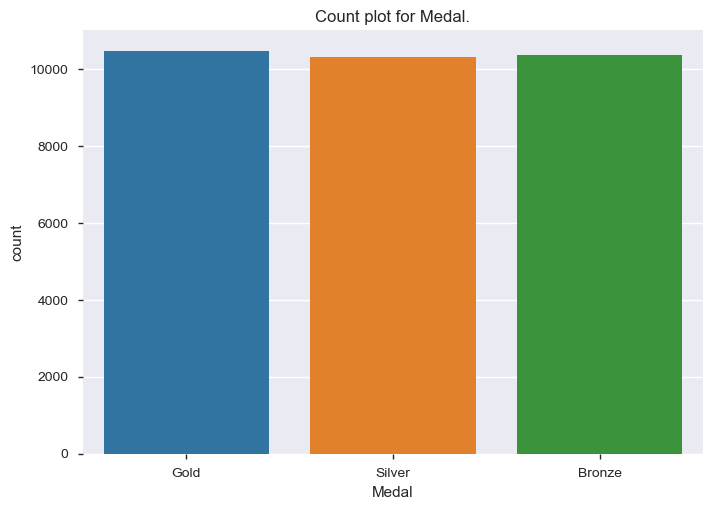

In [139]:
sns.countplot(x='Medal', data=summer_olympic).set_title('Count plot for Medal.')

#### OutCome: 

It seems that almost a small difference between these 3 medals won by athletes. and that indicates some of the athletes medal updation on the datset is missing. As normal case must be: Gold = Silver = Bronze. 

From the above outcome its clear that there are around 174 entries missing who won Bronze and 115 entries are missing who won Silver.

So total missing values: 174+115 = 289

### 2. Total no of Men and women athletes who won medals.

In [140]:
summer_olympic.groupby(['Gender'])['Gender'].count()

Gender
Men      22745
Women     8418
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Count plot for Mean and Women Participants.')

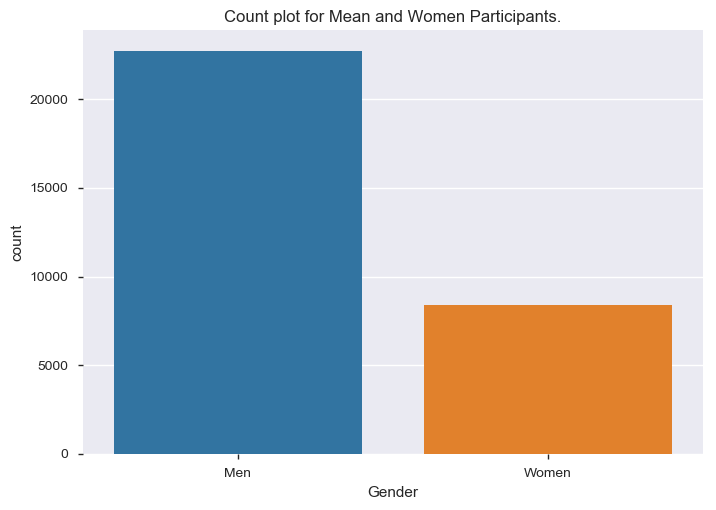

In [141]:
sns.countplot(x='Gender', data=summer_olympic).set_title('Count plot for Mean and Women Participants.')

Text(0, 0.5, 'PARTICIPANTS')

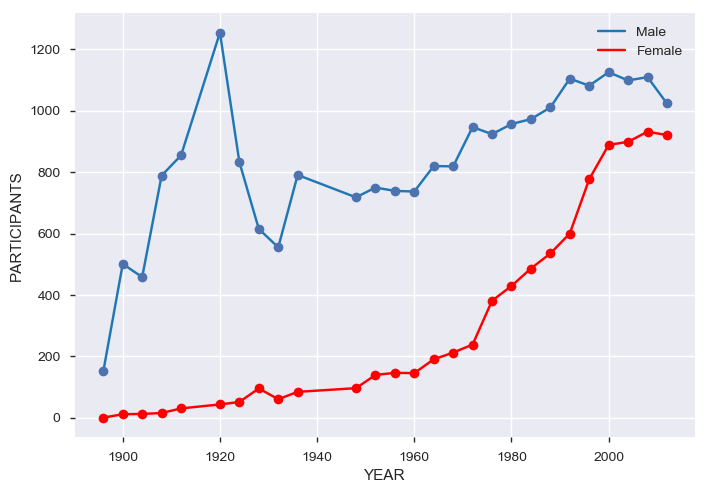

In [46]:
groupedGender = pd.concat([summer_olympic,pd.get_dummies(summer_olympic.Gender)],axis=1).groupby(['Year'],as_index=False).sum()
groupedGender.head()
plt.plot(groupedGender.Year,groupedGender.Men)
plt.plot(groupedGender.Year,groupedGender.Women,color='Red')

plt.plot(groupedGender.Year,groupedGender.Men,'bo')
plt.plot(groupedGender.Year,groupedGender.Women,'bo',color='Red')

plt.legend(['Male','Female'])
plt.xlabel('YEAR')
plt.ylabel('PARTICIPANTS')

#### Outcome:

From the above graph its clear that Men participants are much more as compared to Women. 
But a good thing happen is that as year wise olympic progresses the women particpant also increases. Great sign for sports.

### 3. Total no of disciplines on which medal own by athletes.

In [148]:
summer_olympic.groupby(['Discipline'])['Discipline'].count().sort_values(ascending=False).head()

Discipline
Athletics      3638
Rowing         2667
Swimming       2628
Artistic G.    2103
Fencing        1613
Name: Discipline, dtype: int64

In [150]:
summer_olympic.groupby(['Discipline'])['Discipline'].count().sort_values(ascending=False).tail()

Discipline
Modern Pentathlon    6
Water Motorspor      5
Basque Pelota        4
Roque                3
Jeu de Paume         3
Name: Discipline, dtype: int64

Text(0.5, 1.0, 'Count plot for Sport discipline.')

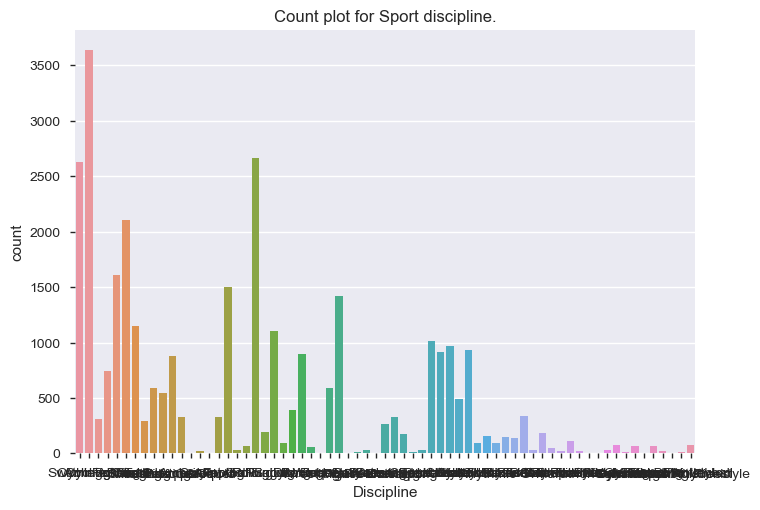

In [149]:
sns.countplot(x='Discipline', data=summer_olympic).set_title('Count plot for Sport discipline.')

#### outcome: 
From the previous Code its clear that below are the events fetch more medals:
Athletics      3638
Rowing         2667
Swimming       2628
Artistic G.    2103
Fencing        1613

And below fetch less medals:
Modern Pentathlon    6
Water Motorspor      5
Basque Pelota        4
Roque                3
Jeu de Paume         3

I am not sure what these games are but as they are present just following them in the analysis.

### 4. The year in which the summer olympic played on

In [48]:
summer_olympic['Year'].unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012], dtype=int64)

#### outcome

From the above years we found though olumpic is carried out in every 4 year,but because of wordwar 1940 and 1944 is missing,
And its true that No olympic is played on these 2 set.

### 5. No of medals won in year wise

In [49]:
summer_olympic['Year'].value_counts()

2008    2042
2000    2015
2004    1998
2012    1945
1996    1859
1992    1705
1988    1546
1984    1459
1980    1386
1976    1305
1920    1298
1972    1185
1968    1031
1964    1010
1952     889
1956     885
1912     885
1924     884
1960     882
1936     875
1948     814
1908     804
1928     710
1932     615
1900     512
1904     470
1896     151
Name: Year, dtype: int64

Text(0.5, 1.0, 'Count plot for Year.')

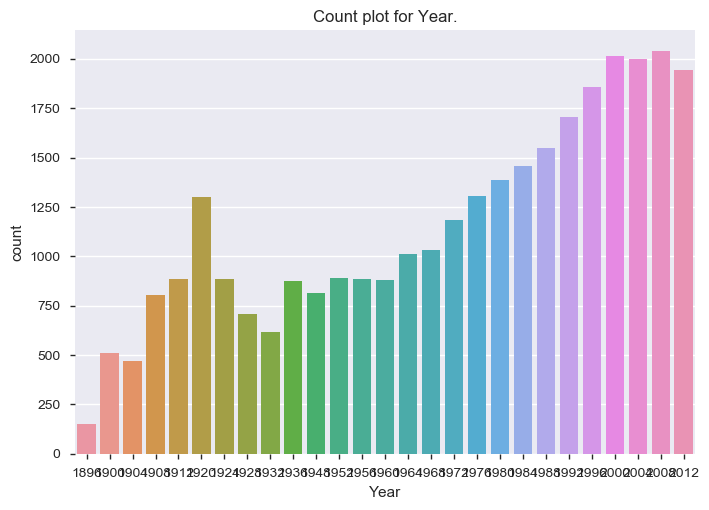

In [50]:
sns.countplot(x='Year', data=summer_olympic).set_title('Count plot for Year.')

#### Outcome:

From the above analysis 2008 is the year on which medal won is highest and 1896 is the lowest. And its obvious that during starting of olympic less games are played and once it continues new games are added. 


### 6. Medal won by Country wise

Text(0.5, 1.0, 'Count plot for Medal won by Country wise.')

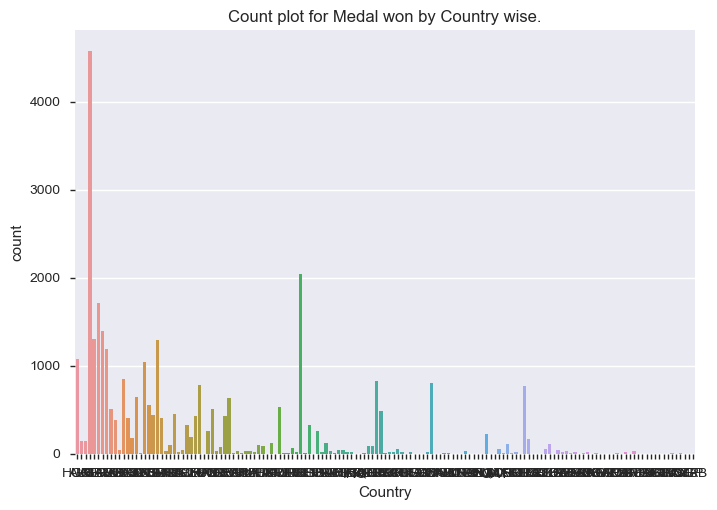

In [151]:
sns.countplot(x='Country', data=summer_olympic).set_title('Count plot for Medal won by Country wise.')

#### Outcome:
USA is the country who top in the mdeal tally than others.

### 7. Year wise countries participation.

In [152]:
print('No of participating nations:-> ',len(summer_olympic.Country.unique()))

No of participating nations:->  148


Text(0, 0.5, 'COUNTRY')

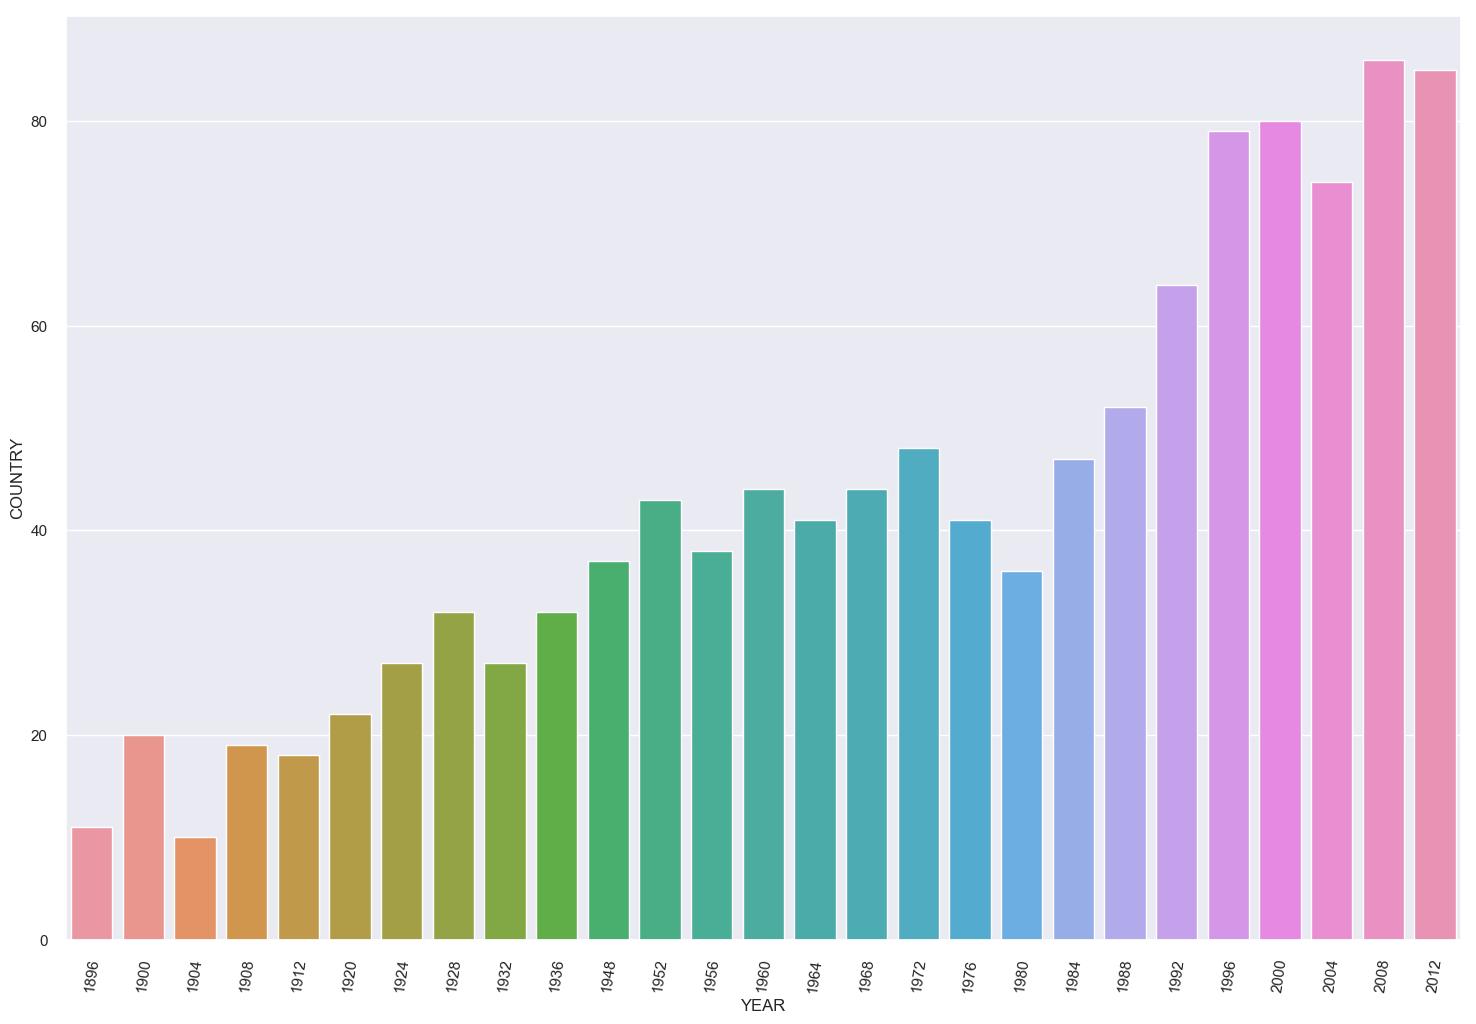

In [153]:
groupByCountryAndYear = summer_olympic.groupby(['Year','Country'],as_index=False).count()[['Year','Country']]
groupByCountryAndYear = groupByCountryAndYear.groupby('Year',as_index=False).count()
#groupByCountryAndYear
sns.set(rc={'figure.figsize':(18,12)})
plot1 = sns.barplot('Year','Country',data=groupByCountryAndYear).set_xticklabels(groupByCountryAndYear.Year,rotation=82)
plt.xlabel('YEAR')
plt.ylabel("COUNTRY")

#### Outcome:
From the graph its clear that the no of participant country is increasing year by year. That means its gains popularity in different countries.The graph is shown below is clear the point.

In [155]:
df = pd.concat([summer_olympic,pd.get_dummies(summer_olympic.Medal)],axis=1)

In [156]:
df['AllMedals'] = df['AllMedals'] = df['Bronze']+df['Silver']+df['Gold']

In [157]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver,AllMedals
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,0,1,0,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,0,1,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,1,0,0,1
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,0,1,0,1
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,0,0,1,1


In [158]:
groupByCountry = df.groupby(by=['Country'],as_index=False).sum()

In [159]:
top50 = groupByCountry.sort_values(by=['AllMedals'],ascending = False).head(50)

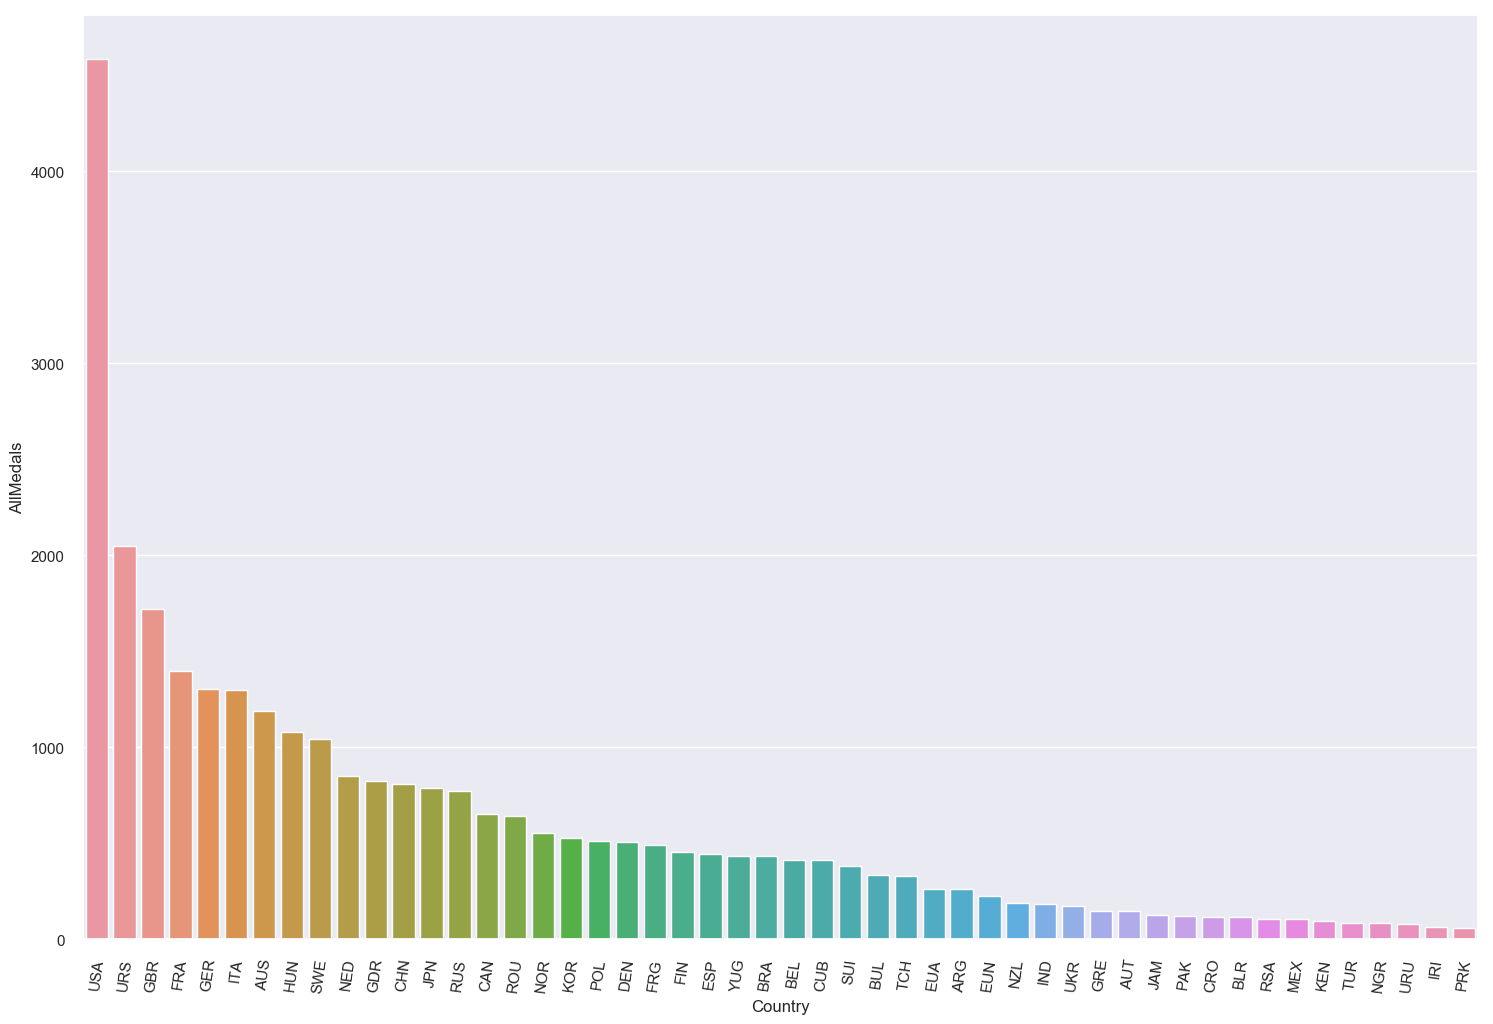

In [160]:
plot2 = sns.barplot('Country','AllMedals',data=top50).set_xticklabels(top50.Country,rotation=82)

### 8.Year wise top countries.

In [161]:
groupByYearAndCountry = df.groupby(by=['Year','Country'],as_index=False).sum()

yearTop = pd.DataFrame()
y= df.Year.unique()
for i in y:
    yearTop = pd.concat([yearTop,groupByYearAndCountry[groupByYearAndCountry['Year'] == i].sort_values(by=['AllMedals'],ascending=False).head(1)])

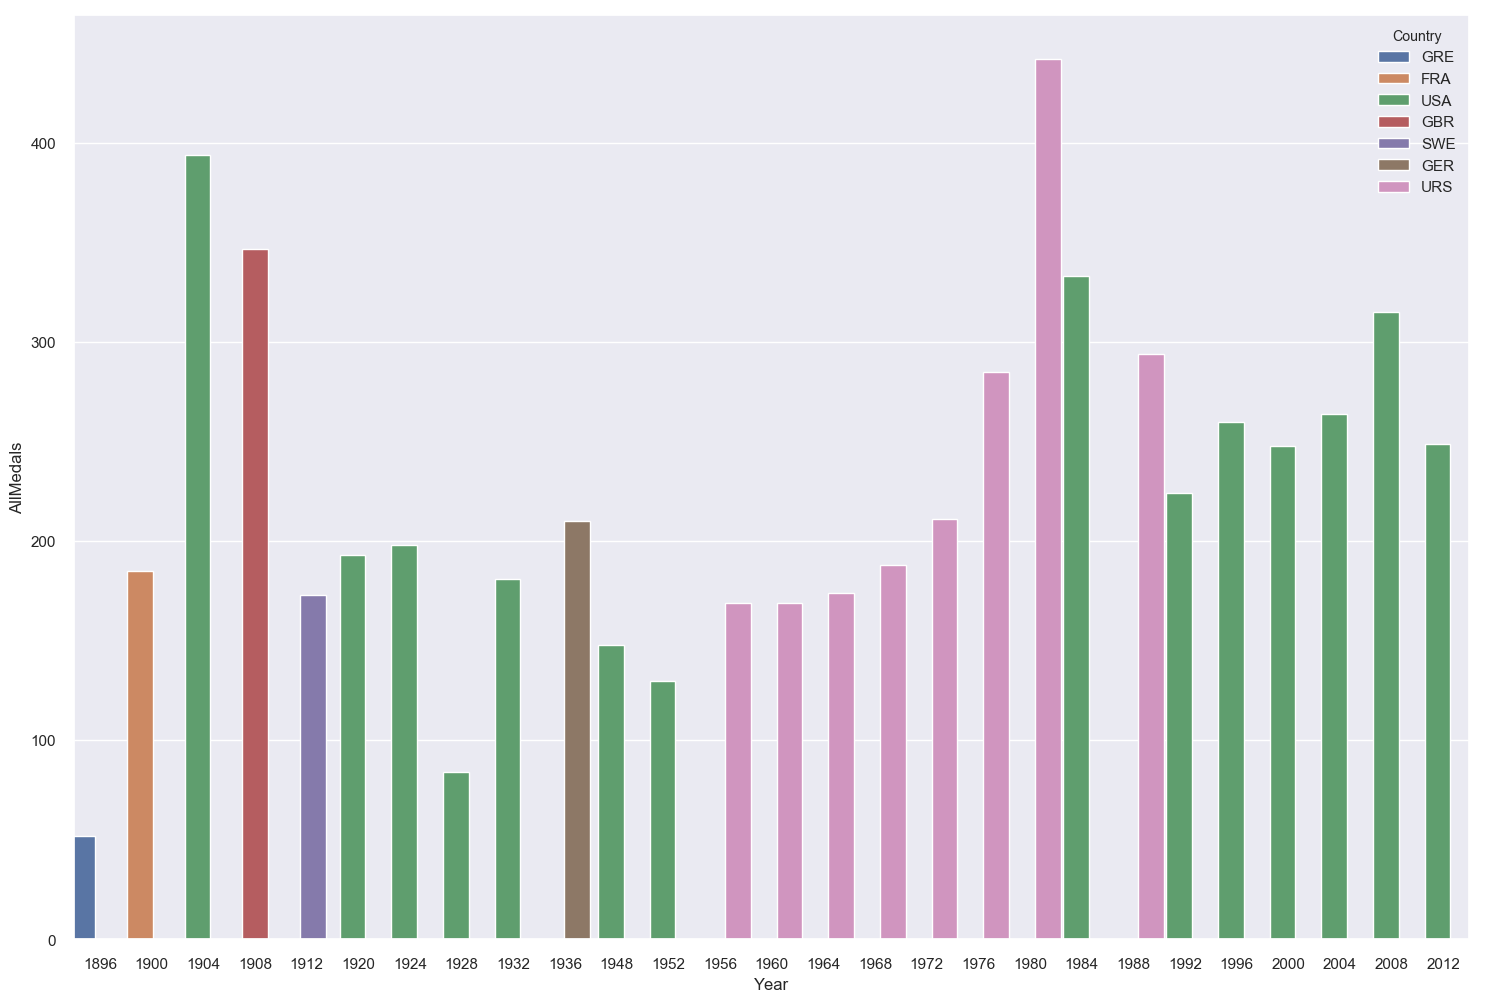

In [162]:
fig,ax = plab.subplots()

sns.barplot('Year','AllMedals',hue='Country',data=yearTop,ax=ax)

def change_width(ax,new_value):
    for patch in ax.patches:
        cur_width = patch.get_width()
        diff = cur_width - new_value
        
        patch.set_width(new_value)
        
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(ax,.50)

plab.show()

#### outcome: 
From the above its clear that from 1896 to 2012:- USA top for 14 times. And second is by USSR (Soviet Union)

### 9. The Countries domination on a sport

In [163]:
grpBySport = df.groupby(by=['Sport','Country'],as_index=False).sum()

sportTop = pd.DataFrame()

sp = df.Sport.unique()

for i in sp:
    sportTop = pd.concat([sportTop,grpBySport[grpBySport['Sport'] == i].sort_values(by=['AllMedals'],ascending=False).head(1)])

sportTop = sportTop[['Sport','Country','Bronze','Silver','Gold','AllMedals']]
sportTop

,Sport,Country,Bronze,Silver,Gold,AllMedals
53,Aquatics,USA,262.0,344.0,578.0,1184.0
173,Athletics,USA,208.0,295.0,491.0,994.0
371,Cycling,GBR,54.0,49.0,42.0,145.0
447,Fencing,ITA,71.0,128.0,145.0,344.0
535,Gymnastics,URS,49.0,99.0,142.0,290.0
828,Shooting,USA,38.0,36.0,116.0,190.0
906,Tennis,GBR,16.0,22.0,23.0,61.0
1027,Weightlifting,URS,2.0,21.0,39.0,62.0
1088,Wrestling,USA,33.0,43.0,52.0,128.0
69,Archery,KOR,8.0,11.0,41.0,60.0


### 10. Dominance by USA on summer olympic in Sport as per medal tally

In [63]:
set(sportTop[sportTop['Country'] == 'USA']['Sport'])

{'Aquatics',
 'Athletics',
 'Basketball',
 'Boxing',
 'Equestrian',
 'Football',
 'Golf',
 'Ice Hockey',
 'Roque',
 'Rowing',
 'Sailing',
 'Shooting',
 'Wrestling'}

#### Outcome:
Like we can find others dominace and list it out. 

In [64]:
sportTop[sportTop['Sport'] == 'Baseball']

,Sport,Country,Bronze,Silver,Gold,AllMedals
189,Baseball,CUB,0.0,48.0,63.0,111.0


#### Outcome: 

Like also we can figure it out for each game who is the dominant country.

### 11. Top players with no of medals

In [65]:
df.Athlete.value_counts()[:5]

PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Athlete, dtype: int64

In [66]:
len(df[(df.Athlete == 'PHELPS, Michael') & (df.Medal == 'Gold')])

18

#### Outcome: 
PHELPS, Michael  is the most valuable athlete as he won 22 medals as single handed. in swimming and clearly has dominat in that field. 

### 12.India's Medal Analysis

In [67]:
dfIndia = df[df.Country == 'IND']
dfIndia.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver,AllMedals
241,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M,Silver,0,0,1,1
244,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M Hurdles,Silver,0,0,1,1
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold,0,1,0,1
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold,0,1,0,1
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold,0,1,0,1


In [68]:
sorted(dfIndia.Year.unique())

[1900,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1980,
 1996,
 2000,
 2004,
 2008,
 2012]

In [69]:
dfIndia['AllMedals'].sum()

183

#### Outcome: 
Though is shows 183 medals but it also includes but according to olympic any team event is calculated as one medal. So This is not the right calculation of medals in different field.

In [70]:
#actaul no of Medals won by India in different events
dfIndia.groupby(['Year','Event'],as_index=False).max()['AllMedals'].sum()

26

### outcome: 
Here is the actual events on which India had won medals. 

In [71]:
#Sports in which India won a Medal
set(dfIndia[dfIndia.AllMedals == 1].Sport.unique())

{'Athletics',
 'Badminton',
 'Boxing',
 'Hockey',
 'Shooting',
 'Tennis',
 'Weightlifting',
 'Wrestling'}

In [72]:
#Sports in which India won a gold Medal
dfIndia[dfIndia.Gold == 1].Sport.unique()

array(['Hockey', 'Shooting'], dtype=object)

In [73]:
#Name of the Athelete in individual team event won a Medal may be shooting , so Lets figure it out
dfIndia[(dfIndia.Gold == 1) & (dfIndia.Sport == 'Shooting')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver,AllMedals
28856,2008,Beijing,Shooting,Shooting,"BINDRA, Abhinav",IND,Men,10M Air Rifle (60 Shots),Gold,0,1,0,1


In [74]:
#Years in whcih India won gold medal as a team
dfIndia[(dfIndia.Gold == 1) & (dfIndia.Sport == 'Hockey')]['Year'].unique()

array([1928, 1932, 1936, 1948, 1952, 1956, 1964, 1980], dtype=int64)

In [75]:
#Plotting india's performance on olympics over years
dFindYear = dfIndia.groupby(['Year','Event'],as_index = False).max()
dFindYear = dFindYear.groupby(['Year'],as_index=False).sum()

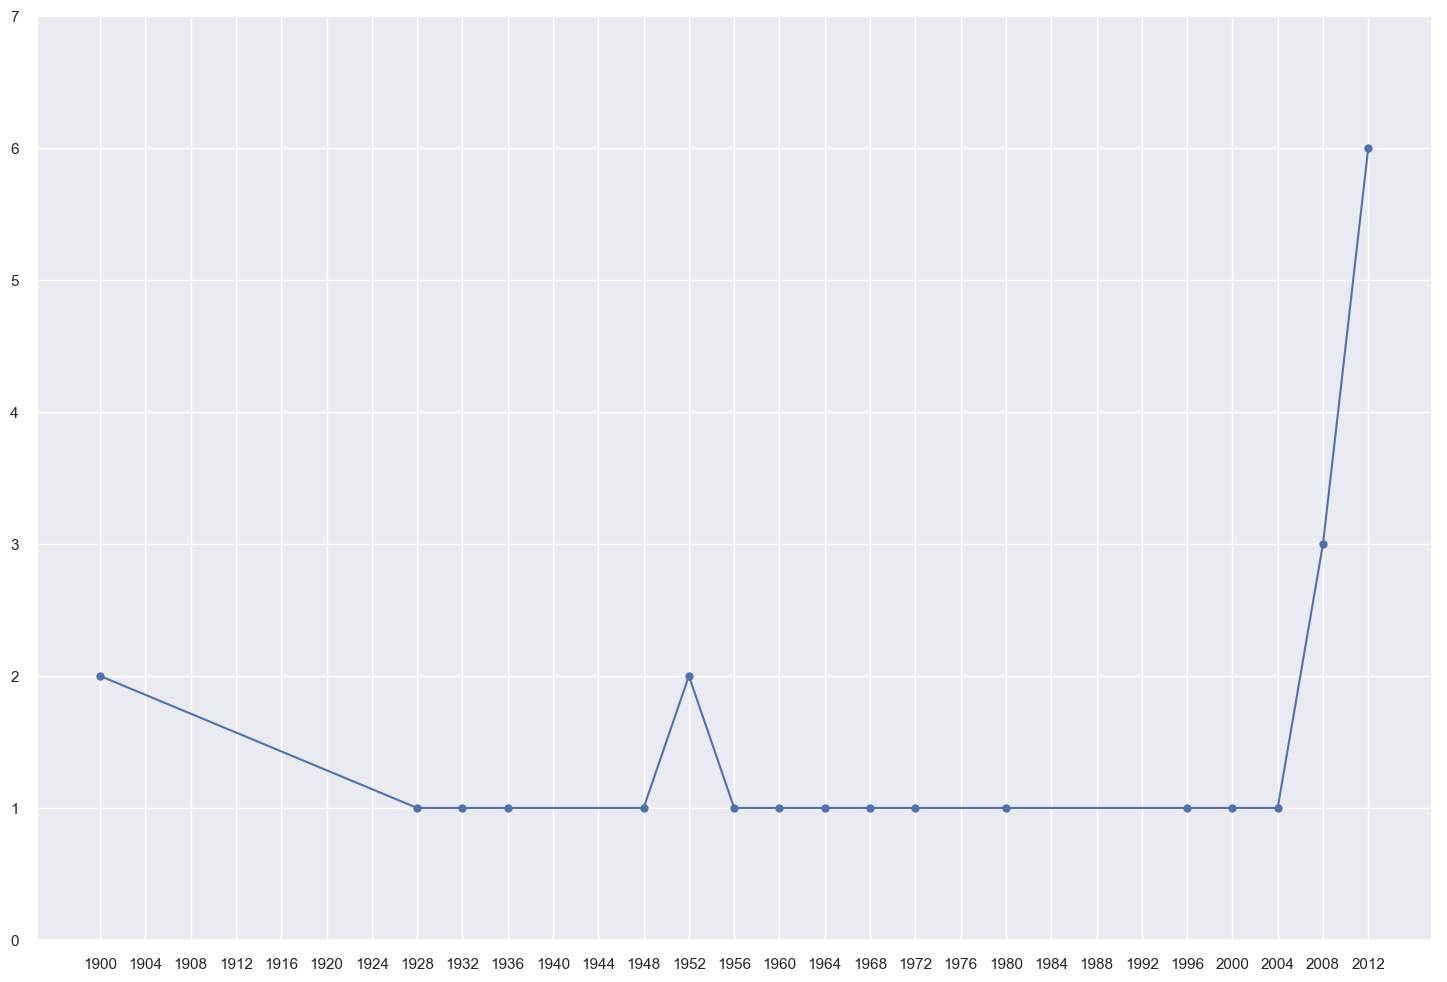

In [76]:
plab.plot(dFindYear.Year,dFindYear.AllMedals)
plab.plot(dFindYear.Year,dFindYear.AllMedals,'bo')
plab.yticks(range(0,8))
plab.xticks(range(1900,2016,4))
plab.show()

In [77]:
#Top 10 players with Most number of medals
medals = df.groupby('Athlete',as_index='False').sum()

In [84]:
mostMedals = medals.sort_values(by=['AllMedals'],ascending=False)
mostMedals[['Bronze','Silver','Gold','AllMedals']].head(10)

,Bronze,Silver,Gold,AllMedals
Athlete,,,,
"PHELPS, Michael",2,2,18,22
"LATYNINA, Larisa",4,5,9,18
"ANDRIANOV, Nikolay",3,5,7,15
"MANGIAROTTI, Edoardo",2,5,6,13
"SHAKHLIN, Boris",2,4,7,13
"ONO, Takashi",4,4,5,13
"FISCHER, Birgit",0,4,8,12
"NURMI, Paavo",0,3,9,12
"COUGHLIN, Natalie",5,4,3,12


In [79]:
#Athelete have won equals or more than 10 medals
print("Number of Athletes won more than 10 medal:-> ",len(mostMedals[mostMedals.AllMedals >= 10]))

Number of Athletes won more than 10 medal:->  28


In [80]:
#Athelete With most numbers of Gold medals
mostGoldMedals = medals.sort_values(by=['Gold'],ascending=False)
mostGoldMedals.head(10)[['Gold']]

,Gold
Athlete,
"PHELPS, Michael",18
"LEWIS, Carl",9
"SPITZ, Mark",9
"NURMI, Paavo",9
"LATYNINA, Larisa",9
"THOMPSON, Jenny",8
"FISCHER, Birgit",8
"KATO, Sawao",8
"BIONDI, Matthew",8


In [83]:
#List those Athletes who missed gold more than 3 times
mostMedals[(mostMedals.Silver) > (mostMedals.Gold+3)][['Silver']]

,Silver
Athlete,
"VAN ALMSICK, Franziska",4
"VORONIN, Mikhail",6
"TITOV, Yuri",5
"BABASHOFF, Shirley Farber",6
"HASE, Dagmar",5
"HOLMERTZ, Anders",4
"TAKEDA, Miho",4
"ZUCHOLD, Erika",4
"LISITSKY, Viktor",5


This analysis is completely based on my understanding, so does not have any thridparty inclusions. So kindly let me know if it needs any futher enhancements and please have suggestions and feedbacks.

The sources of this analysis is from:
Wikipedia, kaggle, datascience,Stackoverflow.

